# Kmeans Segmentation

In [1]:
# This use case is very common and it is used in BFS industry(credit card) 
#and retail for customer segmenattion.

# import the libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Data Visualization
import seaborn as sns  # Python library for Vidualization
import os
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv('Clientes.csv')
df = df.iloc[:, [3, 4]].values
wcss = []


In [15]:
# we always assume the max number of cluster would be 10
# Static code to get max no of clusters

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

    # inertia_ is the formula used to segregate the data points into clusters


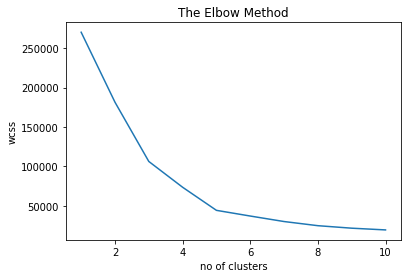

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()
plt.savefig('Kmeans_inertia.png', dpi=200)

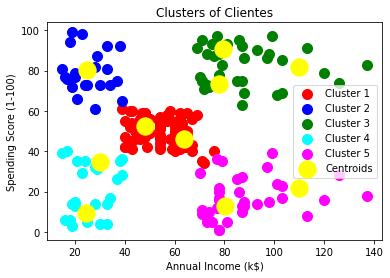

<Figure size 432x288 with 0 Axes>

In [17]:
# Model Build
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(df)


plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1],
            s=100, c='red', label='Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1],
            s=100, c='blue', label='Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1],
            s=100, c='green', label='Cluster 3')
plt.scatter(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1],
            s=100, c='cyan', label='Cluster 4')
plt.scatter(df[y_kmeans == 4, 0], df[y_kmeans == 4, 1],
            s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
plt.savefig('Clientes_Clusters.png', dpi=200)


In [19]:
# Model Interpretation
# Cluster 1 (Red Color) -> earning high but spending less
# cluster 2 (Blue Colr) -> average in terms of earning and spending
# cluster 3 (Green Color) -> earning high and also spending high [Objetive set "target"]
# cluster 4 (cyan Color) -> earning less but spending more
# Cluster 5 (magenta Color) -> Earning less , spending less


######We Tip we can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse ######
# wherein others we can set like once in a week or once in
